In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 
DATADIR="./Train"  #Directory where images are stored in folder Cat and Dog
CATEGORIES=["Cat", "Dog"] #Equivalent to the names given in parent directory
IMG_SIZE=60 #This is used to standardize the size of the image
train_data=[] #Array to store the training data
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num= CATEGORIES.index(category) #Cat:0 and Dog:1
        for img in os.listdir(path):
            try:   #Error is called if any broken image is encountered
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR) 
                new_array= cv2.resize(img_array, (IMG_SIZE,IMG_SIZE)) 
                train_data.append([new_array,class_num])
            except Exception as e:
                pass 
create_training_data()

In [3]:
import random
random.shuffle(train_data)

In [4]:
train_X=[] 
train_Y=[]
for features, labels in train_data:
    train_X.append(features)
    train_Y.append(labels)

It is a Cat


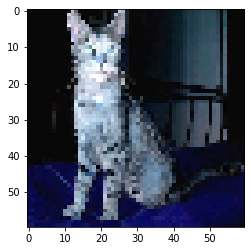

In [5]:
plt.imshow(train_X[1], cmap='gray')
print("It is a", CATEGORIES[train_Y[1]])
plt.show()

In [6]:
for feature, label in train_data:
    mirror_image=np.fliplr(feature) #Rotating each image by 180 degree
    train_X.append(mirror_image)
    train_Y.append(label)

In [7]:
DATADIR="/Users/kartikeygarg/Desktop/Assignment/Test"  #Directory where images are stored in folder Cat and Dog
CATEGORIES=["Cat", "Dog"] #Equivalent to the names given in parent directory
IMG_SIZE=60 #This is used to standardize the size of the image
train_data=[] #Array to store the training data
def create_testing_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num= CATEGORIES.index(category) #Cat:0 and Dog:1
        for img in os.listdir(path):
            try:   #Error is called if any broken image is encountered
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
                new_array= cv2.resize(img_array, (IMG_SIZE,IMG_SIZE)) 
                train_data.append([new_array,class_num])
            except Exception as e:
                pass 
create_testing_data()
import random
random.shuffle(train_data)
test_X=[] 
test_Y=[]
for features, labels in train_data:
    test_X.append(features)
    test_Y.append(labels)

In [8]:
#I am flattening the images so that they can be take as an input in the perceptron. 
train_X_flatten=np.array(train_X).reshape(np.array(train_X).shape[0],-1).T
print(train_X_flatten.shape)
test_X_flatten=np.array(test_X).reshape(np.array(test_X).shape[0],-1).T
print(test_X_flatten.shape)

(10800, 80)
(10800, 4)


In [9]:
#We also have to normalise the training and testing set as it would make the learning much faster.
train_X_norm=train_X_flatten/255 
test_X_norm=test_X_flatten/255

### The above portion will remain same for all the questions with little changes. It concerns with data extraction, compilation and augmentation. We will build perceptron from hereon.

In [10]:
# Function to compute sigmoid for a given scalar value or array N
def sigmoid(N): 
    result = 1/(1+np.exp(-N))    
    return result

In [11]:
# Now we have to give weight to each input. For that we will first initalize parameters w, weight and b, bias
def initialize(dim):
    #dim is the dimension of the input which we are feeding to the perceptron
    w = np.zeros((dim,1))
    #bias is only a single value for each input
    b = 0
    assert(w.shape == (dim, 1)) # This is used to ensure that w has appropriate dimensions
    assert(isinstance(b, float) or isinstance(b, int))
    return w, b

#### As we are done with initalization part we can now look at forward and backward propogation. I have not performed any derviations in the code but used direct results.

In [12]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X)+b) # computing sigmoid
    cost = -1/m*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A)) 
    F=A-Y
    dw = 1/m*np.dot(X,F.T)
    db = 1/m*np.sum(F)
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

#### Now we'll try to update the parameters w and b using optimisation algorithm given below

In [13]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(num_iterations): #number of times weights will be updated
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w-learning_rate*dw
        b = b-learning_rate*db
        if i % 100 == 0:
            costs.append(cost)     
        if print_cost and i % 100 == 0:     # Print the cost after every 100 training iterations
            print ("Cost after iteration %i: %f" %(i, cost))
    params = {"w": w,
              "b": b}   
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [14]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    A = sigmoid(-(np.dot(w.T,X)+b))
    for i in range(A.shape[1]):
            if(A[0][i]<=0.5):
                Y_prediction[0][i]=1
            else:
                Y_prediction[0][i]=0
    assert(Y_prediction.shape == (1, m))
    return Y_prediction

In [15]:
# GRADED FUNCTION: model

def model(train_X, train_Y, test_X, test_Y, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    b = 0
    w= np.zeros((2,1))
    nw= np.zeros((train_X.shape[0],1))
    parameters, grads, costs = optimize(nw, b, train_X, train_Y, num_iterations, learning_rate, print_cost)
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    nw= np.zeros((test_X.shape[0],1))
    Y_prediction_test = predict(w, b, test_X)
    nw=np.zeros((train_X.shape[0],1))
    Y_prediction_train = predict(w, b, train_X)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - train_Y)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - test_Y)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [16]:
model(train_X_norm,np.array(train_Y).T,test_X_norm,np.array(test_Y).T,learning_rate=0.005)

train accuracy: 100.0 %
test accuracy: 100.0 %


{'costs': [0.6931471805599454,
  0.23145048795710035,
  0.13874477069953822,
  0.10125352035015647,
  0.07940905022119615,
  0.06518182383180315,
  0.055209355161009825,
  0.04784486998705695,
  0.042190456078079336,
  0.0377162068106685,
  0.034089779756757484,
  0.031092435938591623,
  0.028574450712753968,
  0.026429954801489824,
  0.024582012180378355,
  0.022973391396331696,
  0.021560651181868486,
  0.020310232076850867,
  0.019195803804267303,
  0.01819642221540573],
 'Y_prediction_test': array([[0., 1., 0., 1.]]),
 'Y_prediction_train': array([[0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
         0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
         1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
         1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
         1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.]]),
 'w': array([[-0.00968775],
        [-0.00859336],
        [-0.02937661],
        

### As can be seen above we have acheived 100% accuracy. 

#### Here I will save the data so that it can be used in future without the need of long code that I have written in the 1st half of the code.

In [17]:
import pickle
pickle_out=open("train_X.pickle","wb")
pickle.dump(train_X, pickle_out)
pickle_out.close()
pickle_out=open("train_Y.pickle","wb")
pickle.dump(train_Y, pickle_out)
pickle_out.close()
pickle_out=open("test_X.pickle","wb")
pickle.dump(test_X, pickle_out)
pickle_out.close()
pickle_out=open("test_Y.pickle","wb")
pickle.dump(test_Y, pickle_out)
pickle_out.close()

#### We have created file for future use of this data. We'll use it in ANN_Classifier: Que3.